# Metric Learning

Jakub Darul

Lab2

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from typing import List, Tuple

import numpy as np
import pandas as pd
from functional import seq
from fn import _
from copy import deepcopy
import random
import sklearn.neighbors as nb
import img_utils,knn_sklearn,sklearn_mahalanobis,sklearn_utils,point


> Przygotowałem kilka zbiorów punktów metodą painta zasugerowaną w zadaniu.

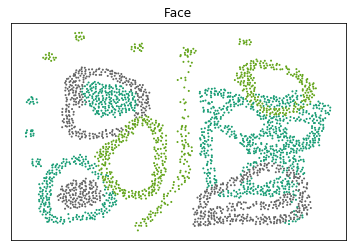

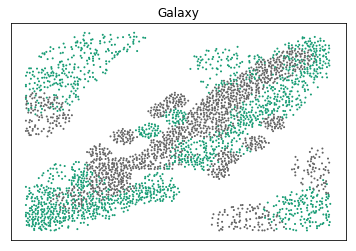

In [5]:
images = "small_density.bmp,small_face.bmp,small_galaxy.bmp,wave.bmp".split(",")
descriptive_labels= ["Irregular, varying density","Separated,\n 3 classes, one class inside another, mixed classes","Spindle shaped classes","Additional test cas"]
labels=["Horse","Face","Galaxy","Wave"]
images = img_utils.load_and_preprocess_all(images)

images_points=[]

for image,label,descriptive_label in zip(images,labels,descriptive_labels):
        pts=knn_sklearn.add_noise(image.shape,img_utils.get_points(image),radius=0.4)
        images_points.append(pts)
        sklearn_utils.plot_just_points(pts,title=label)


In [6]:
def present(classifier:nb.KNeighborsClassifier):
    for pts,label,descriptive_label in zip(images_points,labels,descriptive_labels):
            X,y = img_utils.get_X_y(pts)
            sklearn_utils.fit_and_plot(classifier,X,y,title = label,h=0.2)
            avg ,std_dev = knn_sklearn.get_accuracy_sklearn_avg(classifier,pts)
            print("accuracy:{}%, std_dev: {}".format(avg*100,std_dev*100))

# Działanie k-NN dla różnych parametrów ( głosowanie, k, metryka) :

> Liczenie accuracy powtarzałem dla każdego przypadku 10 razy i uśredniłem wyniki.

##  k-NN z k=1, głosowaniem większośćiowym i metryką Euklidesa:

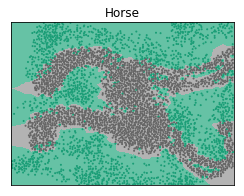

accuracy:91.14%, std_dev: 0.65


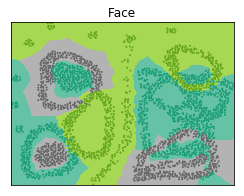

accuracy:94.74000000000001%, std_dev: 0.74


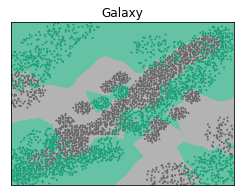

accuracy:87.33999999999999%, std_dev: 0.58


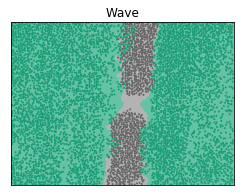

accuracy:97.15%, std_dev: 0.31


In [7]:
present(nb.KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='auto',metric='euclidean'))

##  k-NN z k=3, głosowaniem większośćiowym i metryką Euklidesa

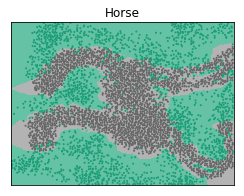

accuracy:93.02%, std_dev: 0.44


accuracy:95.94%, std_dev: 0.61


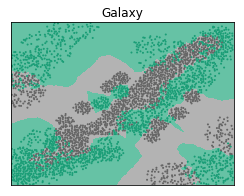

accuracy:88.79%, std_dev: 0.9199999999999999


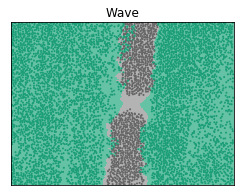

accuracy:97.71%, std_dev: 0.33


In [8]:
present(nb.KNeighborsClassifier(n_neighbors=3,weights='uniform',algorithm='auto',metric='euclidean'))

##  k-NN z k=3, głosowaniem większośćiowym i metryką Euklidesa:

accuracy:92.58%, std_dev: 0.59


accuracy:95.54%, std_dev: 0.35000000000000003


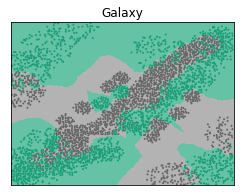

accuracy:88.81%, std_dev: 0.6


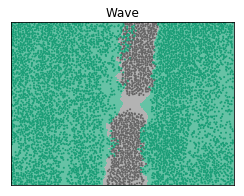

accuracy:97.78%, std_dev: 0.27


In [9]:
present(nb.KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto',metric='euclidean'))

> k-NN dla metryki euklidesowej przynosiło bardzo zbliżone parametry dla wszystkich parametrów

##  k-NN z k=1, głosowaniem większośćiowym i metryką Mahalanobisa:

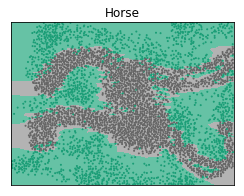

accuracy:91.19%, std_dev: 0.53


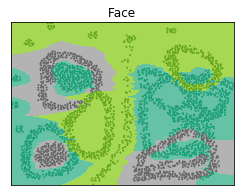

accuracy:95.30999999999999%, std_dev: 0.48


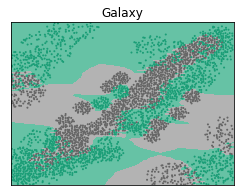

accuracy:87.3%, std_dev: 1.0999999999999999


accuracy:97.46000000000001%, std_dev: 0.27999999999999997


In [10]:
present(nb.KNeighborsClassifier(n_neighbors=1,weights='uniform',algorithm='brute',metric='mahalanobis'))

Można zauważyć, że w metryce mahalanobisa otoczenie się "rozciąga", szczególnie jest to widoczne w obrazkach "Galaxy" i "Wave"

## k-NN z k=1, głosowaniem większośćiowym i metryką Mahalanobisa zależną od regionu:

> wybrałem obszary 5x5

In [11]:
def present_mahalanobis_area():
    
    for image,pts,label,descriptive_label in zip(images,images_points,labels,descriptive_labels):
            X,y = img_utils.get_X_y(pts)
    
            sklearn_utils.fit_and_plot_mahalanobis_area(sklearn_mahalanobis.MahalanobisParial(1,pts,image.shape),X,y,h=0.8)
            avg ,std_dev = sklearn_mahalanobis.get_accuracy_mahalanobis_area_avg(1,pts,image.shape)
            print("accuracy:{}%, std_dev: {}".format(avg*100,std_dev*100))

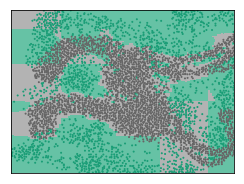

accuracy:77.3%, std_dev: 1.3


accuracy:73.4%, std_dev: 1.6


accuracy:78.81%, std_dev: 0.8200000000000001


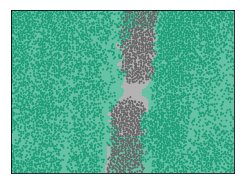

accuracy:92.25999999999999%, std_dev: 0.53


In [12]:
present_mahalanobis_area()

> Dla meryki mahalanobisa zależnej od obszaru ( wystąpiły artefakty: prostokątne obszary wpływów danego koloru).